In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt
import seaborn as sns




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\pc\.conda\envs\rec\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\pc\.conda\envs\rec\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\pc\.conda\envs\rec\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\pc\.conda\envs\rec\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\pc\.conda\envs\r

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

download_num:  16


In [3]:
df = pd.read_csv('../data/raw/Mobile_Frappe/frappe/frappe.csv', sep="\t")
df.head()

,user,item,cnt,daytime,weekday,isweekend,homework,cost,weather,country,city
0,0,0,1,morning,sunday,weekend,unknown,free,sunny,United States,0
1,1,1,7,afternoon,saturday,weekend,unknown,free,cloudy,Spain,0
2,2,2,6,evening,monday,workday,unknown,free,cloudy,Spain,369
3,3,3,1,sunset,thursday,workday,unknown,free,unknown,United States,1028
4,4,4,428,night,thursday,workday,home,free,sunny,Switzerland,147


In [21]:
# Normalize 'cnt' to a rating scale of 1 to 5
max_cnt = df['cnt'].max()

df['rating'] = df['cnt'] / max_cnt * 5

# Ensure that the 'rating' column is within the desired scale
print(df[['cnt', 'rating']].head())
max_cnt


   cnt    rating
0    1  0.000174
1    7  0.001217
2    6  0.001043
3    1  0.000174
4  428  0.074430


28752

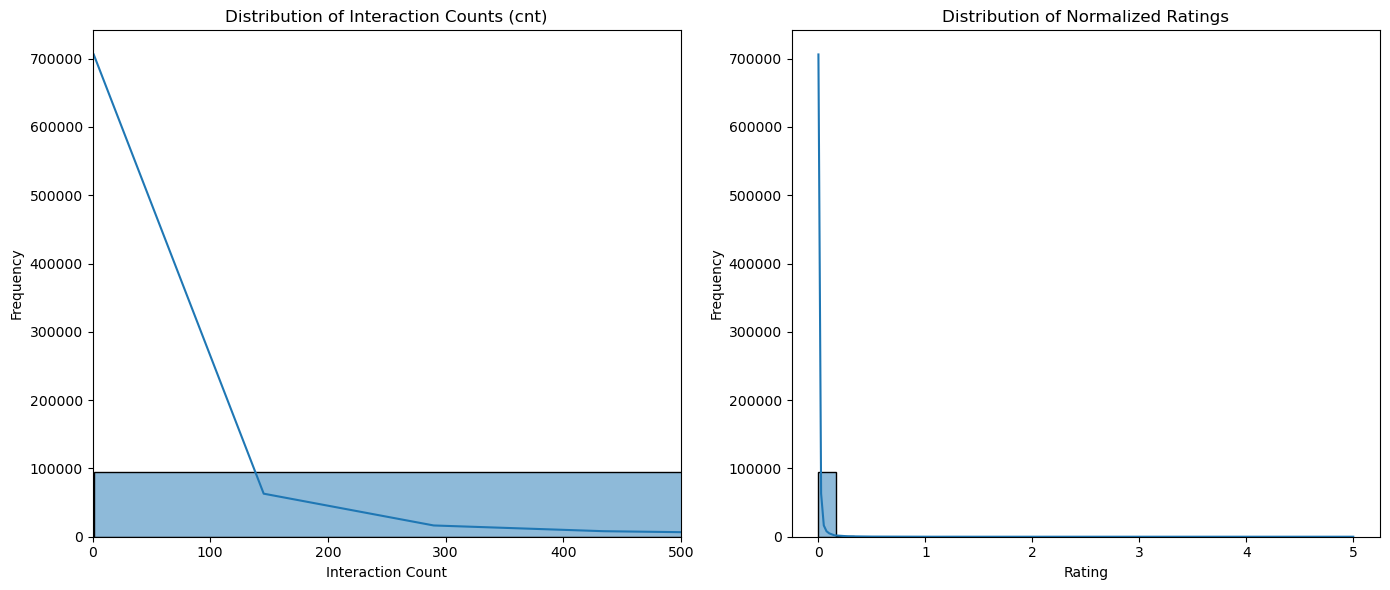

In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Set up the visualizations
plt.figure(figsize=(14, 6))

# Original 'cnt' distribution with x-axis limited to 1000
plt.subplot(1, 2, 1)
sns.histplot(df['cnt'], bins=30, kde=True)
plt.xlim(0, 500)  # Limit x-axis to 1000
plt.title('Distribution of Interaction Counts (cnt)')
plt.xlabel('Interaction Count')
plt.ylabel('Frequency')

# Normalized 'rating' distribution
plt.subplot(1, 2, 2)
sns.histplot(df['rating'], bins=30, kde=True)
plt.title('Distribution of Normalized Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


In [7]:
unique_homeworks = df['homework'].unique()
unique_homeworks

array(['unknown', 'home', 'work'], dtype=object)

In [8]:
city = df['city'].unique()
print("city_num: ", len(city))


city_num:  233


In [16]:
cost = df['cost'].unique()
print("cost: ", cost)

cost:  ['free' 'paid']


In [6]:
print ("In the frappe data set we have {} entries by {} users for {} apps".format(len(df), len(df.user.unique()), len(df.item.unique())))

In the frappe data set we have 96203 entries by 957 users for 4082 apps


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96203 entries, 0 to 96202
Columns: 346 entries, user to city_1087
dtypes: bool(343), int64(3)
memory usage: 33.7 MB
None
               user          item           cnt
count  96203.000000  96203.000000  96203.000000
mean     189.646944    386.754207     81.330894
std      156.458370    683.779627    395.414980
min        0.000000      0.000000      1.000000
25%       74.000000     21.000000      2.000000
50%      153.000000     77.000000      8.000000
75%      271.000000    397.000000     36.000000
max      956.000000   4081.000000  28752.000000


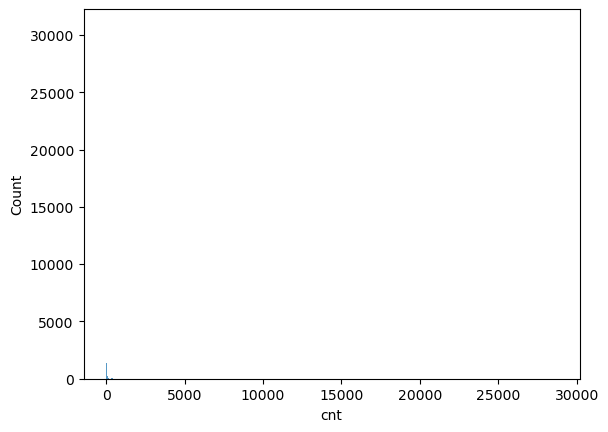

In [10]:
# Load the processed data
data = pd.read_csv("../data/processed/processed_data.csv")

# Display basic statistics and information
print(data.info())
print(data.describe())

# Visualize distributions and relationships
sns.histplot(data['cnt'])
plt.show()


In [7]:
df = pd.read_csv('../data/raw/meta.csv', sep="\t")
downloads = df['downloads'].unique()
print("download_num: ", len(downloads))
print("download: ", downloads)  

download_num:  16
download:  ['1,000,000 - 5,000,000' '50,000,000 - 100,000,000' '10,000 - 50,000'
 '100,000,000 - 500,000,000' 'unknown' '500,000 - 1,000,000'
 '100,000 - 500,000' '5,000,000 - 10,000,000' '10,000,000 - 50,000,000'
 '50,000 - 100,000' '50,000,000+' '5,000 - 10,000' '1,000,000+' '10,000+'
 '100,000+' '500,000+']


In [23]:
# Load item detail data
item_data = pd.read_csv('../data/raw/meta.csv', sep="\t")

# Define the download mapping
DOWNLOAD_MAPPING = {
    '1,000,000 - 5,000,000': 3000000,
    '50,000,000 - 100,000,000': 75000000,
    '10,000 - 50,000': 30000,
    '100,000,000 - 500,000,000': 300000000,
    'unknown': 0,
    '500,000 - 1,000,000': 750000,
    '100,000 - 500,000': 300000,
    '5,000,000 - 10,000,000': 7500000,
    '10,000,000 - 50,000,000': 30000000,
    '50,000 - 100,000': 75000,
    '50,000,000+': 50000000,
    '5,000 - 10,000': 7500,
    '1,000,000+': 1000000,
    '10,000+': 10000,
    '100,000+': 100000,
    '500,000+': 500000
}


item_data['downloads'] = item_data['downloads'].map(DOWNLOAD_MAPPING)

# Count occurrences of each download range
download_counts = item_data['downloads'].value_counts()


# Sort the download counts
sorted_download_counts = download_counts.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=item_data['downloads'], y=item_data['normalized_downloads'])
plt.title('Distribution of App Downloads')
plt.xlabel('Number of Apps')
plt.ylabel('Download Range')
plt.show()





KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000021848F11310> (for post_execute):


KeyboardInterrupt: 